<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Regression Model Development</h2>

 

Hult International Business School

DAT5303 - MsBA2 - Machine Learning

Professor Chase Kusterer

Created by: Shuxin Li

Date: Jan 14, 2021

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


In [1]:
# importing libraries
import numpy as np # mathematical essentials
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # regression modeling
import sklearn.linear_model # linear models
from timeit import default_timer as timer

# from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression

start = timer()

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying the path and file name
file = './Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
chef = pd.read_excel(file)

# checking the file
chef.head(n = 15)


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.00,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.00,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.00,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.00,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.00,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205
5,1550.00,1,Genna Lannister,genna.lannister@protonmail.com,Genna,Lannister,36,2,9,1,190.18,1,4,0,1,4,1,0,0,3,1,0,78.8,1,1,3,12,0
6,1430.00,1,Olene Tyrell,olene.tyrell@mcdonalds.com,Olene,Tyrell,61,7,6,2,154.20,1,1,0,1,6,1,45,1,2,1,1,84.8,1,0,3,12,169
7,1321.25,1,Stevron Frey,stevron.frey@travelers.com,Stevron,Frey,13,1,12,3,228.73,1,0,0,1,6,1,13,0,0,0,0,63.0,1,0,1,15,0
8,1505.00,1,Praed,praed@nike.com,Praed,Praed,16,1,12,5,14.26,1,0,0,1,6,1,52,0,1,0,0,63.0,1,0,2,18,0
9,1493.00,0,Alysane Mormont,alysane.mormont@caterpillar.com,Alysane,Mormont,95,3,6,8,49.26,1,0,0,0,6,1,12,0,2,1,0,84.8,1,1,3,14,147


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Null Value</h3><br>

Checking the missing values for chef data

Result: Family Name is the only variable which has missing values in the data set, and it seems this variable will not have significantly impact with our independent value, and I am going to replace with Unknown.

<br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

In [2]:
# checking the null variable for chef data
chef.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [3]:
# Filling NA's
chef.loc[:,'FAMILY_NAME'].fillna('Unknown',inplace = True)


 <hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Apprentice Chef Data Dictionary</h3><br>
 
* Dependent variable: REVENUE

* Independent variables:

* Binary variable: 
        CROSS_SELL_SUCCESS (Success of the cross-sell promotion (1 = yes, 0 = no))
        MOBILE_NUMBER (Indicates whether the registered phone number of a custmer is mobile or landline (1 = mobile, 0 = landline))
        TASTES_AND_PREFERENCES (Customer specified their tastes and preferences in their profile (1 = has preference, 0 = no preference))
        PACKAGE_LOCKER (Customer's residence/building has a package locker service or package room (1 = has locker, 0 = no locker))
        REFRIGERATED_LOCKER (Package locker has refrigerated compartments (1 = has locker, 0 = no locker))
    
* Count/Interval:
        UNIQUE_MEALS_PURCH
        CONTACTS_W_CUSTOMER_SERVICE
        PRODUCT_CATEGORIES_VIEWED
        CANCELLATIONS_BEFORE_NOON
        CANCELLATIONS_AFTER_NOON
        PC_LOGINS
        MOBILE_LOGINS
        WEEKLY_PLAN
        EARLY_DELIVERIES
        LATE_DELIVERIES
        LARGEST_ORDER_SIZE
        MASTER_CLASSES_ATTENDED
        MEDIAN_MEAL_RATING
        AVG_CLICKS_PER_VISIT
        TOTAL_PHOTOS_VIEWED
            
* Continuous variabels:
        TOTAL_MEALS_ORDERED
        AVG_TIME_PER_SITE_VISIT
        AVG_PREP_VID_TIME
        REVENUE        
         
* Categorical variables:
        NAME
        EMAIL
        FIRST_NAME
        FAMILY_NAME

<br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>                     


In [4]:
# descriptive statistics for numeric data
chef.describe(include = 'number').round(decimals = 2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Analyzing the Distribution of Sale Prices</h3><br>

Before we do any test, we want to check our Y-variable if follows a normal distribution, so I develop a histogram to analyze the distribution of the Y-variable by using sns.displot. The plot shows that the data is skewed positive. We will need to transform our Y-variable using logarithm. With the second plot shows, we can see it's a normal distribution, so I will use log_REVENUE for further analysis.


<br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


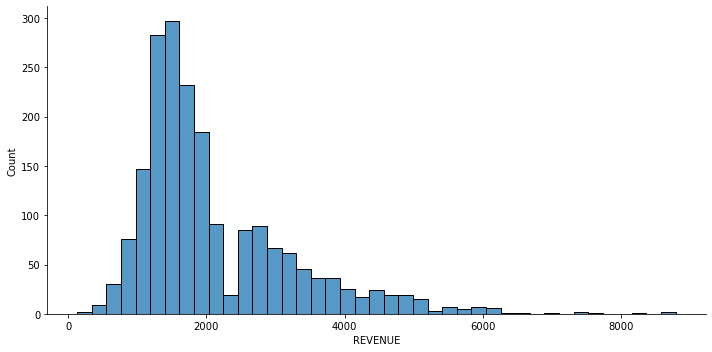

In [5]:
# developing a histogram using DISPLOT 
sns.displot(data   = chef,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)


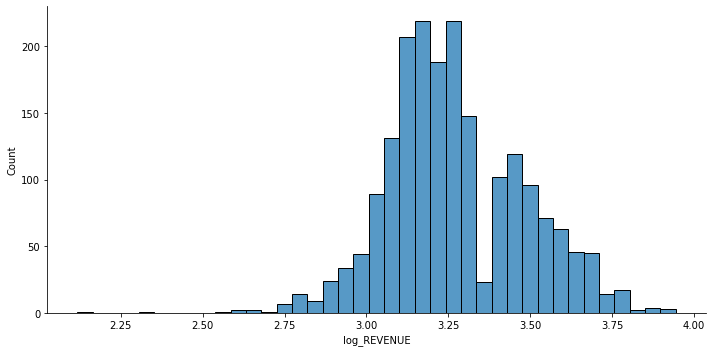

In [6]:
# log transforming Sale_Price and saving it to the dataset
chef['log_REVENUE'] = np.log10(chef['REVENUE'])

# developing a histogram using DISPLOT with log_REVENUE
sns.displot(data = chef,
            x = 'log_REVENUE',
            height = 5,
            aspect = 2)

plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Visualizing with Boxplot</h3><br>
When working with Interval and count variables, I use boxplots to visualize the relationships with each variable. Some of the boxplots appear that the median lines can not be connected using a straight line, so I decide to create dummy variables.


<br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

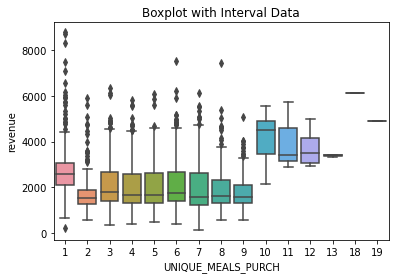

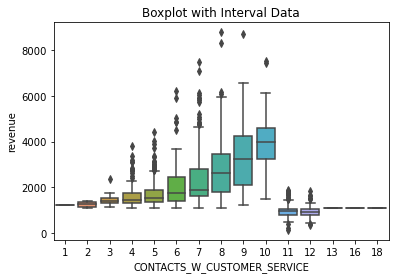

In [7]:
# developing a boxplot UNIQUE_MEALS_PURCH
sns.boxplot(x    = 'UNIQUE_MEALS_PURCH',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'revenue')


# displaying the plot
plt.show()

# developing a boxplot CONTACTS_W_CUSTOMER_SERVICE
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'revenue')


# displaying the plot
plt.show()

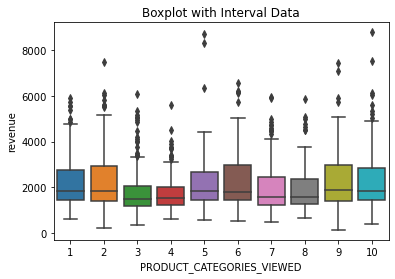

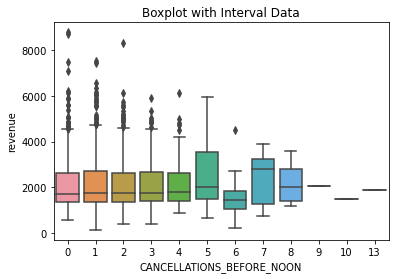

In [8]:
# developing a boxplot PRODUCT_CATEGORIES_VIEWED
sns.boxplot(x    = 'PRODUCT_CATEGORIES_VIEWED',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'revenue')


# displaying the plot
plt.show()

# developing a boxplot CANCELLATIONS_BEFORE_NOON
sns.boxplot(x    = 'CANCELLATIONS_BEFORE_NOON',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CANCELLATIONS_BEFORE_NOON')
plt.ylabel(ylabel = 'revenue')


# displaying the plot
plt.show()

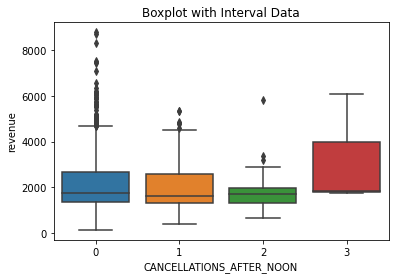

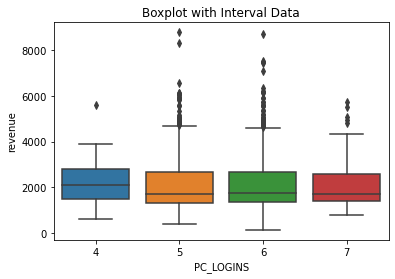

In [9]:
# developing a boxplot CANCELLATIONS_AFTER_NOON
sns.boxplot(x    = 'CANCELLATIONS_AFTER_NOON',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CANCELLATIONS_AFTER_NOON')
plt.ylabel(ylabel = 'revenue')


# displaying the plot
plt.show()

# developing a boxplot PC_LOGINS
sns.boxplot(x    = 'PC_LOGINS',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PC_LOGINS')
plt.ylabel(ylabel = 'revenue')


# displaying the plot
plt.show()

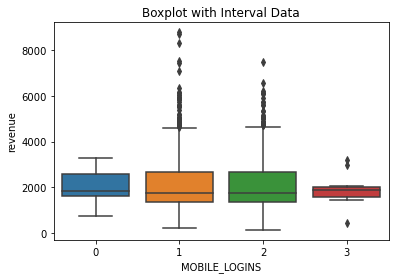

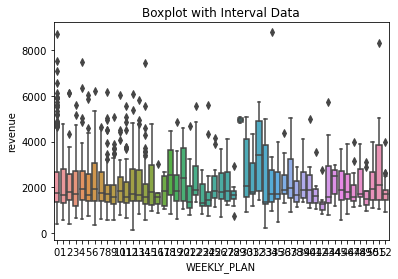

In [10]:
# developing a boxplot MOBILE_LOGINS
sns.boxplot(x    = 'MOBILE_LOGINS',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MOBILE_LOGINS')
plt.ylabel(ylabel = 'revenue')


# displaying the plot
plt.show()

# developing a boxplot WEEKLY_PLAN
sns.boxplot(x    = 'WEEKLY_PLAN',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'WEEKLY_PLAN')
plt.ylabel(ylabel = 'revenue')


# displaying the plot
plt.show()

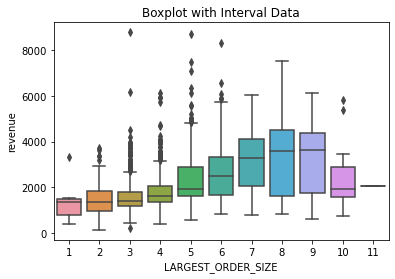

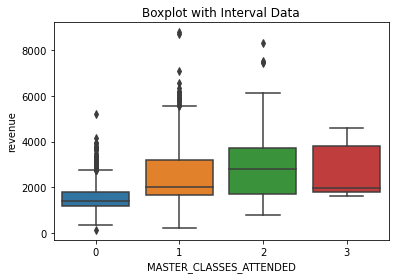

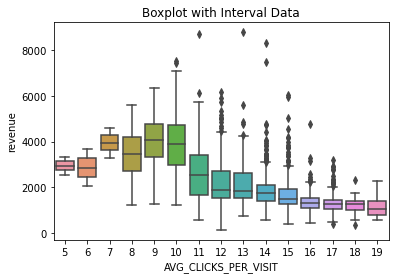

In [11]:
# developing a boxplot LARGEST_ORDER_SIZE
sns.boxplot(x    = 'LARGEST_ORDER_SIZE',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'LARGEST_ORDER_SIZE')
plt.ylabel(ylabel = 'revenue')


# displaying the plot
plt.show()

# developing a boxplot MASTER_CLASSES_ATTENDED
sns.boxplot(x    = 'MASTER_CLASSES_ATTENDED',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MASTER_CLASSES_ATTENDED')
plt.ylabel(ylabel = 'revenue')


# displaying the plot
plt.show()


# developing a boxplot AVG_CLICKS_PER_VISIT
sns.boxplot(x    = 'AVG_CLICKS_PER_VISIT',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'AVG_CLICKS_PER_VISIT')
plt.ylabel(ylabel = 'revenue')


# displaying the plot
plt.show()

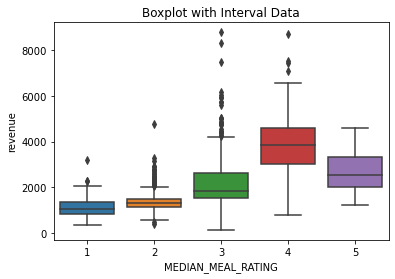

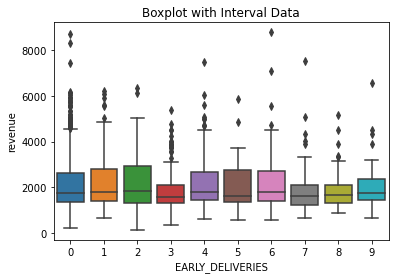

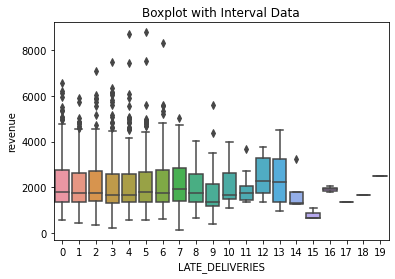

In [12]:
# developing a boxplot MEDIAN_MEAL_RATING
sns.boxplot(x    = 'MEDIAN_MEAL_RATING',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'revenue')


# displaying the plot
plt.show()


# developing a boxplot EARLY_DELIVERIES
sns.boxplot(x    = 'EARLY_DELIVERIES',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'EARLY_DELIVERIES')
plt.ylabel(ylabel = 'revenue')


# displaying the plot
plt.show()

# developing a boxplot LATE_DELIVERIES
sns.boxplot(x    = 'LATE_DELIVERIES',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'LATE_DELIVERIES')
plt.ylabel(ylabel = 'revenue')


# displaying the plot
plt.show()

In [13]:
# Create dummy variables
chef['d_UNIQUE_MEALS_PURCH'] = 0
chef['d_CONTACTS_W_CUSTOMER_SERVICE'] = 0
chef['d_CANCELLATIONS_BEFORE_NOON'] = 0
chef['d_LARGEST_ORDER_SIZE'] = 0
chef['d_MASTER_CLASSES_ATTENDED'] = 0
chef['d_MEDIAN_MEAL_RATING'] = 0
chef['d_AVG_CLICKS_PER_VISIT'] = 0
chef['d_TOTAL_PHOTOS_VIEWED'] = 0
chef['d_LATE_DELIVERIES'] = 0

# Create a for loop for the dummy variables, iterating each column to change values in the new column
for index, value in chef.iterrows():
    
    # create a if statement for UNIQUE_MEALS_PURCH
    if chef.loc[index, 'UNIQUE_MEALS_PURCH'] < 10:
        chef.loc[index, 'd_UNIQUE_MEALS_PURCH'] = 1
    
    # create a if statement for CONTACTS_W_CUSTOMER_SERVICE
    if chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] < 11:
        chef.loc[index, 'd_CONTACTS_W_CUSTOMER_SERVICE'] = 1
        
    # create a if statement for CANCELLATIONS_BEFORE_NOON
    if chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] < 5:
        chef.loc[index, 'd_CANCELLATIONS_BEFORE_NOON'] = 1
       
    # create a if statement for LARGEST_ORDER_SIZE
    if chef.loc[index, 'LARGEST_ORDER_SIZE'] < 9:
        chef.loc[index, 'd_LARGEST_ORDER_SIZE'] = 1
      
    # create a if statement for MASTER_CLASSES_ATTENDED
    if chef.loc[index, 'MASTER_CLASSES_ATTENDED'] < 3:
        chef.loc[index, 'd_MASTER_CLASSES_ATTENDED'] = 1
     
    # create a if statement for MEDIAN_MEAL_RATING
    if chef.loc[index, 'MEDIAN_MEAL_RATING'] < 5:
        chef.loc[index, 'd_MEDIAN_MEAL_RATING'] = 1
        
    # create a if statement for AVG_CLICKS_PER_VISIT
    if chef.loc[index, 'AVG_CLICKS_PER_VISIT'] < 11:
        chef.loc[index, 'd_AVG_CLICKS_PER_VISIT'] = 1
       
    # create a if statement for TOTAL_PHOTOS_VIEWED
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'd_TOTAL_PHOTOS_VIEWED'] = 1
      
    # create a if statement for LATE_DELIVERIES
    if chef.loc[index, 'LATE_DELIVERIES'] < 8:
        chef.loc[index, 'd_LATE_DELIVERIES'] = 1

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Visualizing with Histogram</h3><br>
When working with Continues variables, I use histogram to visualize the distribution of each variable. Some of the histogram appear to be skewed, so I decide to use log transformation for those variables.


<br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

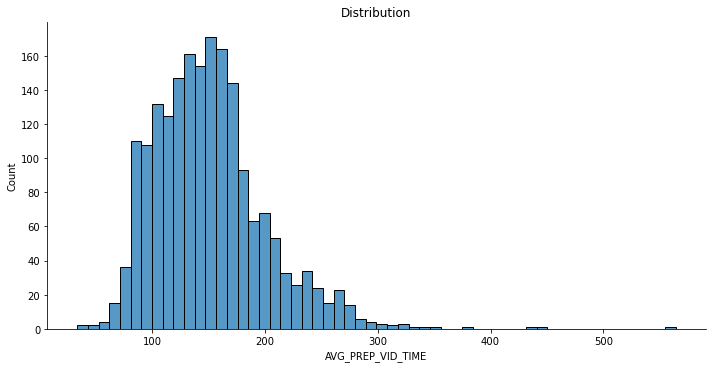

In [14]:
# displaying the plot
sns.displot(x = 'AVG_PREP_VID_TIME',
            data = chef,
            height = 5,
            aspect = 2)


# title and labels
plt.title('Distribution')

# displaying the plot
plt.show()

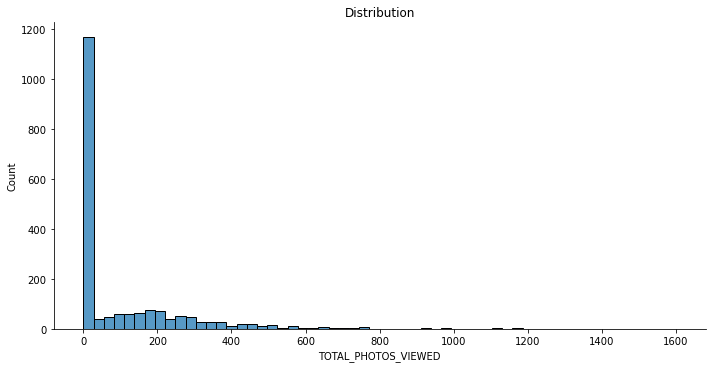

In [15]:
# displaying the plot
sns.displot(x = 'TOTAL_PHOTOS_VIEWED',
            data = chef,
            height = 5,
            aspect = 2)


# title and labels
plt.title('Distribution')

# displaying the plot
plt.show()

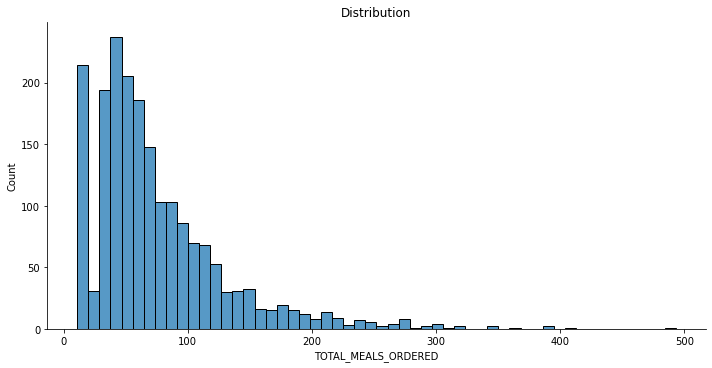

In [16]:
# displaying the plot
sns.displot(x = 'TOTAL_MEALS_ORDERED',
            data = chef,
            height = 5,
            aspect = 2)


# title and labels
plt.title('Distribution')

# displaying the plot
plt.show()


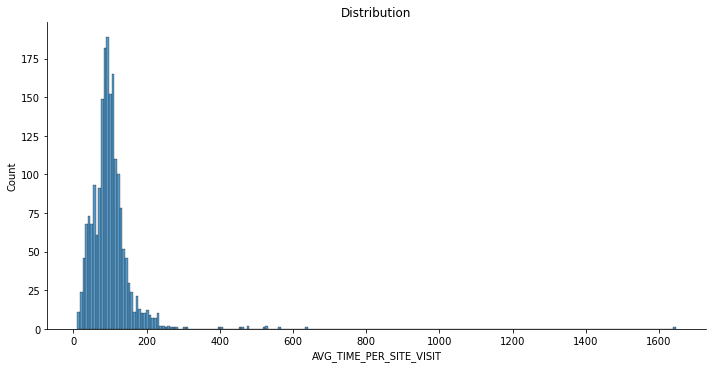

In [17]:
# displaying the plot
sns.displot(x = 'AVG_TIME_PER_SITE_VISIT',
            data = chef,
            height = 5,
            aspect = 2)


# title and labels
plt.title('Distribution')

# displaying the plot
plt.show()

In [18]:
# log transforming TOTAL_MEALS_ORDERED and saving it to the dataset
chef['log_TOTAL_MEALS_ORDERED'] = np.log10(chef['TOTAL_MEALS_ORDERED'])

# log transforming Sale_Price and saving it to the dataset
chef['log_UNIQUE_MEALS_PURCH'] = np.log10(chef['UNIQUE_MEALS_PURCH'])

# log transforming PRODUCT_CATEGORIES_VIEWED and saving it to the dataset
chef['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(chef['PRODUCT_CATEGORIES_VIEWED'])

# log transforming PC_LOGINS and saving it to the dataset
chef['log_PC_LOGINS'] = np.log10(chef['PC_LOGINS'])

# log transforming AVG_PREP_VID_TIME and saving it to the dataset
chef['log_AVG_PREP_VID_TIME'] = np.log10(chef['AVG_PREP_VID_TIME'])

# log transforming AVG_TIME_PER_SITE_VISIT and saving it to the dataset
chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(chef['AVG_TIME_PER_SITE_VISIT'])


# # log transforming Sale_Price and saving it to the dataset
# chef['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(chef['CONTACTS_W_CUSTOMER_SERVICE'])

# # log transforming Sale_Price and saving it to the dataset
# chef['log_CANCELLATIONS_BEFORE_NOON'] = np.log10(chef['CANCELLATIONS_BEFORE_NOON'])

# # log transforming Sale_Price and saving it to the dataset
# chef['log_CANCELLATIONS_AFTER_NOON'] = np.log10(chef['CANCELLATIONS_AFTER_NOON'])

# # log transforming Sale_Price and saving it to the dataset
# chef['log_MOBILE_LOGINS'] = np.log10(chef['MOBILE_LOGINS'])

# # log transforming Sale_Price and saving it to the dataset
# chef['log_WEEKLY_PLAN'] = np.log10(chef['WEEKLY_PLAN'])

# # log transforming Sale_Price and saving it to the dataset
# chef['log_EARLY_DELIVERIES'] = np.log10(chef['EARLY_DELIVERIES'])

# # log transforming Sale_Price and saving it to the dataset
# chef['log_LATE_DELIVERIES'] = np.log10(chef['LATE_DELIVERIES'])

# # log transforming Sale_Price and saving it to the dataset
# chef['log_LARGEST_ORDER_SIZE'] = np.log10(chef['LARGEST_ORDER_SIZE'])

# # log transforming Sale_Price and saving it to the dataset
# chef['log_MASTER_CLASSES_ATTENDED'] = np.log10(chef['MASTER_CLASSES_ATTENDED'])

# # log transforming Sale_Price and saving it to the dataset
# chef['log_MEDIAN_MEAL_RATING'] = np.log10(chef['MEDIAN_MEAL_RATING'])

# # log transforming Sale_Price and saving it to the dataset
# chef['log_AVG_CLICKS_PER_VISIT'] = np.log10(chef['AVG_CLICKS_PER_VISIT'])

# # log transforming Sale_Price and saving it to the dataset
# chef['log_TOTAL_PHOTOS_VIEWED'] = np.log10(chef['TOTAL_PHOTOS_VIEWED'])


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

After use log transforming for the continues variables, I checked the descriptive statistics for numeric data, some of them appears to be Inf values with log transformation which can not be used, so I decided to remove those log variables from above.

In [19]:
# descriptive statistics for numeric data
chef.describe(include = 'number').round(decimals = 2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,log_REVENUE,d_UNIQUE_MEALS_PURCH,d_CONTACTS_W_CUSTOMER_SERVICE,d_CANCELLATIONS_BEFORE_NOON,d_LARGEST_ORDER_SIZE,d_MASTER_CLASSES_ATTENDED,d_MEDIAN_MEAL_RATING,d_AVG_CLICKS_PER_VISIT,d_TOTAL_PHOTOS_VIEWED,d_LATE_DELIVERIES,log_TOTAL_MEALS_ORDERED,log_UNIQUE_MEALS_PURCH,log_PRODUCT_CATEGORIES_VIEWED,log_PC_LOGINS,log_AVG_PREP_VID_TIME,log_AVG_TIME_PER_SITE_VISIT
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43,3.27,0.99,0.89,0.96,0.98,1.00,0.99,0.1,0.41,0.93,1.77,0.62,0.64,0.74,2.16,1.94
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01,0.21,0.10,0.31,0.21,0.13,0.06,0.08,0.3,0.49,0.25,0.32,0.27,0.31,0.05,0.14,0.22
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00,2.12,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.04,0.00,0.00,0.60,1.52,1.01
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00,3.13,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.00,1.00,1.59,0.48,0.48,0.70,2.06,1.86
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00,3.24,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.00,1.00,1.78,0.70,0.70,0.78,2.16,1.97
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00,3.43,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.98,0.85,0.90,0.78,2.24,2.07
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00,3.94,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,2.69,1.28,1.00,0.85,2.75,3.22


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3> Modelling</h3><br>

The following section contains:

* Base Model
* OLS Model
* Lasso Model
* ARD Model
* Model performance


<br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [20]:
# # making a copy of chef
# chef_explanatory = chef.copy()


# # dropping REVENUE, log_REVENUE and other categorical variables from the explanatory variable set
# chef_explanatory = chef_explanatory.drop(['log_REVENUE',
#                                           'REVENUE',
#                                           'NAME',
#                                           'EMAIL',
#                                           'FIRST_NAME',
#                                           'FAMILY_NAME'], axis = 1)


# # formatting each explanatory variable for statsmodels
# for val in chef_explanatory:
#     print(f"{val} +")

In [21]:
# ## Building a Base Model ##

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """  log_REVENUE ~ CROSS_SELL_SUCCESS +
                                                    UNIQUE_MEALS_PURCH +
                                                    CONTACTS_W_CUSTOMER_SERVICE +
                                                    PRODUCT_CATEGORIES_VIEWED +
                                                    REFRIGERATED_LOCKER +
                                                    AVG_PREP_VID_TIME +
                                                    LARGEST_ORDER_SIZE +
                                                    MASTER_CLASSES_ATTENDED +
                                                    MEDIAN_MEAL_RATING +
                                                    TOTAL_PHOTOS_VIEWED +
                                                    log_TOTAL_MEALS_ORDERED +
                                                    log_UNIQUE_MEALS_PURCH +
                                                    log_PRODUCT_CATEGORIES_VIEWED +
                                                    log_AVG_PREP_VID_TIME +
                                                    d_UNIQUE_MEALS_PURCH +
                                                    d_CONTACTS_W_CUSTOMER_SERVICE +
                                                    d_MASTER_CLASSES_ATTENDED +
                                                    d_MEDIAN_MEAL_RATING +
                                                    d_AVG_CLICKS_PER_VISIT +
                                                    d_TOTAL_PHOTOS_VIEWED""",
                                                    data = chef)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     379.1
Date:                Tue, 19 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:03:32   Log-Likelihood:                 1813.7
No. Observations:                1946   AIC:                            -3585.
Df Residuals:                    1925   BIC:                            -3468.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [22]:
# preparing explanatory variable data
chef_data  = chef.drop(['log_REVENUE',
                         'REVENUE',
                         'NAME',
                         'EMAIL',
                         'FIRST_NAME',
                         'FAMILY_NAME'],
                         axis = 1)


# preparing response variable data
chef_target = chef.loc[ : , 'REVENUE']
log_chef_target = chef.loc[ : , 'log_REVENUE']


# preparing training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 38)
y-side: (1459,)


Testing Data
------------
X-side: (487, 38)
y-side: (487,)



In [23]:
# declaring set of x-variables
x_variables = ['TOTAL_MEALS_ORDERED', 'log_UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
              'log_AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED',
              'MEDIAN_MEAL_RATING','CROSS_SELL_SUCCESS', 'd_UNIQUE_MEALS_PURCH',
              'd_CONTACTS_W_CUSTOMER_SERVICE','d_MASTER_CLASSES_ATTENDED','d_MEDIAN_MEAL_RATING',
              'd_AVG_CLICKS_PER_VISIT','d_TOTAL_PHOTOS_VIEWED']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

TOTAL_MEALS_ORDERED +
log_UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
log_AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
CROSS_SELL_SUCCESS +
d_UNIQUE_MEALS_PURCH +
d_CONTACTS_W_CUSTOMER_SERVICE +
d_MASTER_CLASSES_ATTENDED +
d_MEDIAN_MEAL_RATING +
d_AVG_CLICKS_PER_VISIT +
d_TOTAL_PHOTOS_VIEWED +


In [24]:
## Building a OLS Model  ##

# merging X_train and y_train so that they can be used in statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)

# building a model
lm_best = smf.ols(formula = """ log_REVENUE ~ CROSS_SELL_SUCCESS +
                                                    UNIQUE_MEALS_PURCH +
                                                    CONTACTS_W_CUSTOMER_SERVICE +
                                                    PRODUCT_CATEGORIES_VIEWED +
                                                    AVG_PREP_VID_TIME +
                                                    MASTER_CLASSES_ATTENDED +
                                                    MEDIAN_MEAL_RATING +
                                                    TOTAL_PHOTOS_VIEWED +
                                                    
                                                    REFRIGERATED_LOCKER +
                                                    LARGEST_ORDER_SIZE +
                                                    log_TOTAL_MEALS_ORDERED +
                                                    log_PRODUCT_CATEGORIES_VIEWED +
                                                    log_AVG_PREP_VID_TIME +
                                                    log_UNIQUE_MEALS_PURCH +
                                                    d_UNIQUE_MEALS_PURCH +
                                                    d_CONTACTS_W_CUSTOMER_SERVICE +
                                                    d_MASTER_CLASSES_ATTENDED +
                                                    d_MEDIAN_MEAL_RATING +
                                                    d_AVG_CLICKS_PER_VISIT +
                                                    d_TOTAL_PHOTOS_VIEWED""",
                                              data = chef)


# fit the model based on the data
results_fit = lm_best.fit()


# printing the results
print(results_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     379.1
Date:                Tue, 19 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:03:32   Log-Likelihood:                 1813.7
No. Observations:                1946   AIC:                            -3585.
Df Residuals:                    1925   BIC:                            -3468.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [25]:
# Preparing a DataFrame based the the analysis
ols_data   = chef.loc[ : , x_variables]

# Preparing the target variable
chef_target = chef.loc[ : , 'log_REVENUE']


# Create train_test_split for our models
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chef_data,     # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,      # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [26]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7609
OLS Testing Score  : 0.7492
OLS Train-Test Gap : 0.0117


In [27]:
# zipping each feature name to its coefficient
lr_model_values = zip(chef[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    
# # checking the results
# for pair in lr_model_lst:
#     print(pair)

In [28]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 0.01,
                                         normalize = False) 


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lasso_test_gap = abs(lr_train_score - lr_test_score).round(4)

Lasso Training Score : 0.6558
Lasso Testing Score  : 0.6667
Lasso Train-Test Gap : 0.0117


In [29]:
# zipping each feature name to its coefficient
lasso_model_values = zip(chef_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# # checking the results
# for pair in lasso_model_lst:
#     print(pair)

In [30]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7955
Testing Score : 0.7869
ARD Train-Test Gap : 0.0086


In [31]:
# zipping each feature name to its coefficient
ard_model_values = zip(chef_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    
# # checking the results
# for pair in ard_model_lst:
#     print(pair)

In [32]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}            {lr_test_score}
Lasso      {lasso_train_score}            {lasso_test_score}
ARD        {ard_train_score}            {ard_test_score}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score, ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score, ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap, ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst), len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

print(model_performance)




Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.7609            0.7492
Lasso      0.6558            0.6667
ARD        0.7955            0.7869

  Model Type  Training  Testing  Train-Test Gap  Model Size                                              Model
0        OLS    0.7609   0.7492          0.0117          15  [(intercept, 1.51), (TOTAL_MEALS_ORDERED, 0.0)...
1      Lasso    0.6558   0.6667          0.0117          39  [(intercept, 3.1), (CROSS_SELL_SUCCESS, -0.0),...
2        ARD    0.7955   0.7869          0.0086          39  [(intercept, 1.29), (CROSS_SELL_SUCCESS, -0.01...


In [33]:
end = timer()
print(end - start)

13.661624344000002


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3> Winning Model</h3><br>

As we can see, the ARD model works better than OLS and Lasso models, so I will use ARD model.

My code precessing speed is 15.38 seconds


<br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>